# Perform Clustering for the crime data and identify the number of clusters formed and draw inferences

## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [4]:
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## EDA 

In [5]:
data.shape

(50, 5)

In [6]:
data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
#Renaming the column_name
data.rename(columns={"Unnamed: 0": "States"}, inplace=True)

In [8]:
#Info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
#Summary of dataset
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
#Checking duplicate data
data[data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


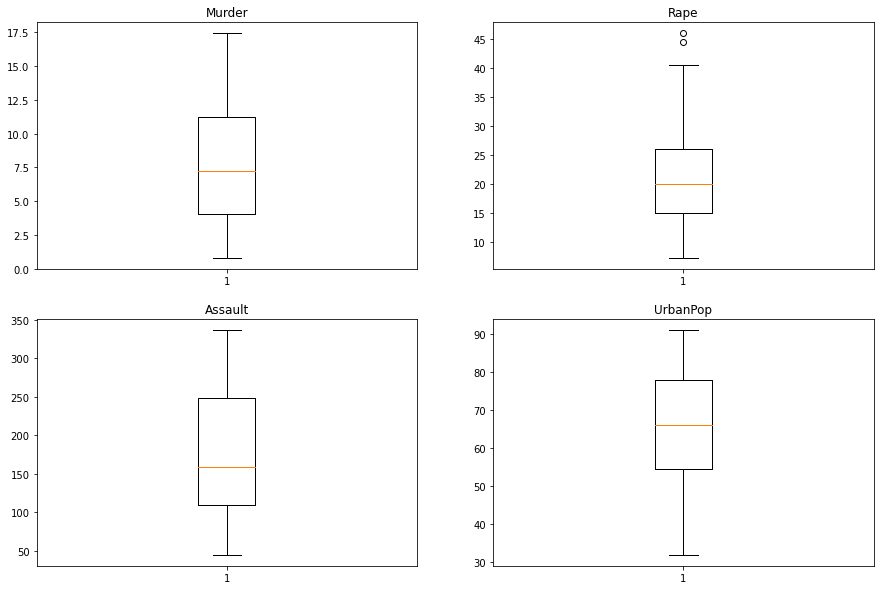

In [11]:
#Checking the outliers
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.boxplot(data['Murder'])
plt.title('Murder')

plt.subplot(2,2,2)
plt.boxplot(data['Rape'])
plt.title('Rape')

plt.subplot(2,2,3)
plt.boxplot(data['Assault'])
plt.title('Assault')

plt.subplot(2,2,4)
plt.boxplot(data['UrbanPop'])
plt.title('UrbanPop')

plt.show()

In [12]:
#Locating the outliers 

np.where(data['Rape']>41)

(array([ 1, 27], dtype=int64),)

In [13]:
# Removing the outliers from dataset

data1 = data.drop(index = [1,27] ,axis = 0).reset_index()
data1 = data1.drop('index', axis = 1)
data1

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Arizona,8.1,294,80,31.0
2,Arkansas,8.8,190,50,19.5
3,California,9.0,276,91,40.6
4,Colorado,7.9,204,78,38.7
5,Connecticut,3.3,110,77,11.1
6,Delaware,5.9,238,72,15.8
7,Florida,15.4,335,80,31.9
8,Georgia,17.4,211,60,25.8
9,Hawaii,5.3,46,83,20.2


In [14]:
data1.shape

(48, 5)

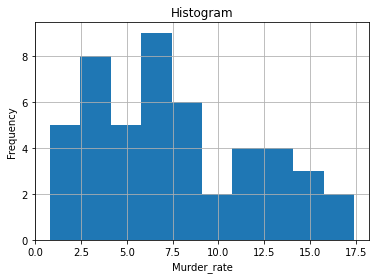

In [15]:
#Visualizing the dataset
data1.hist('Murder')
plt.xlabel('Murder_rate')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

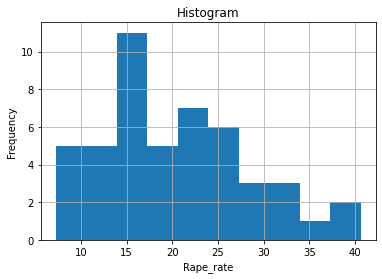

In [16]:
data1.hist('Rape')
plt.xlabel('Rape_rate')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

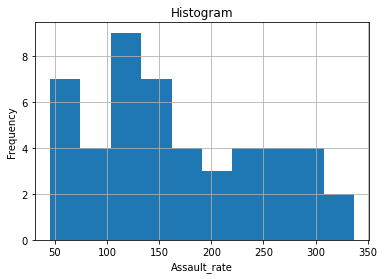

In [17]:
data1.hist('Assault')
plt.xlabel('Assault_rate')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

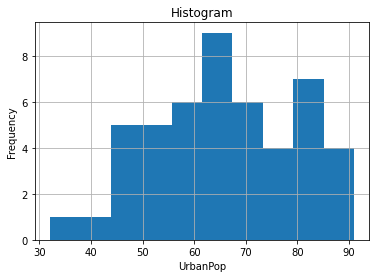

In [18]:
data1.hist('UrbanPop')
plt.xlabel('UrbanPop')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

## Feature Scaling 

In [19]:
data_norm = StandardScaler()

In [20]:
data_norm = data_norm.fit_transform(data1.iloc[:, 1:])

In [21]:
data_norm.shape

(48, 4)

## Model Building using below 3 clustering techniques
* Hierarchial
* K-Means
* DBSCAN

### Hierarchical Clustering

#### Dendogram Visualisation

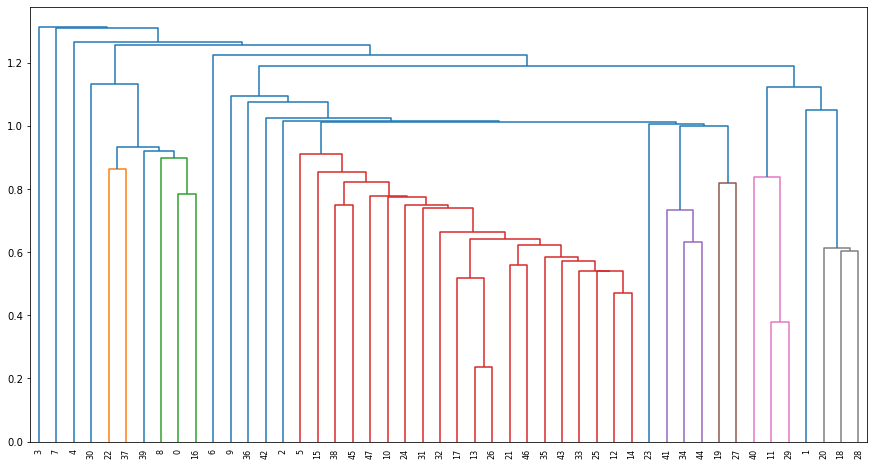

In [20]:
# create dendrogram with single method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='single'))

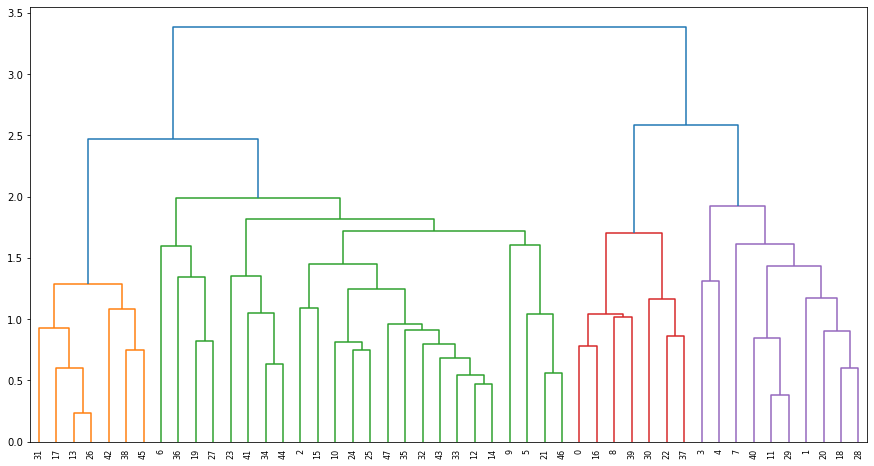

In [21]:
# create dendrogram with average method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

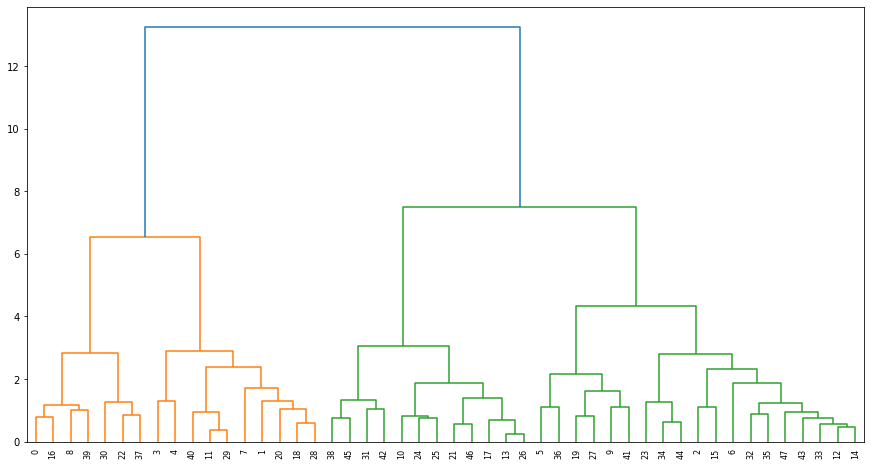

In [22]:
# create dendrogram with ward method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='ward'))

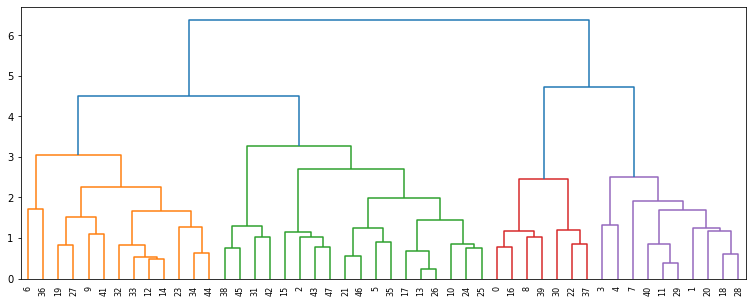

In [23]:
# create dendrogram with complete method
plt.figure(figsize=(13,5))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

### We'll choose complete method for hierarchial clustering since, it has properly distributed into groups for our dataset 

## Model Builing and Model Training 

In [24]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

## Predicting the model

In [25]:
y_hc = hc.fit_predict(data_norm)
y_hc

array([2, 3, 0, 3, 3, 0, 1, 3, 2, 1, 0, 3, 1, 0, 1, 0, 2, 0, 3, 1, 3, 0,
       2, 1, 0, 0, 0, 1, 3, 3, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 3, 1, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [26]:
#Making clusters starting with no.1
data2 = data1.copy()
data2['Clusters'] = y_hc+1
data2

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Arizona,8.1,294,80,31.0,4
2,Arkansas,8.8,190,50,19.5,1
3,California,9.0,276,91,40.6,4
4,Colorado,7.9,204,78,38.7,4
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,2
7,Florida,15.4,335,80,31.9,4
8,Georgia,17.4,211,60,25.8,3
9,Hawaii,5.3,46,83,20.2,2


In [27]:
#No. of states in cluster 1
data2[data2['Clusters']==1]

,States,Murder,Assault,UrbanPop,Rape,Clusters
2,Arkansas,8.8,190,50,19.5,1
5,Connecticut,3.3,110,77,11.1,1
10,Idaho,2.6,120,54,14.2,1
13,Iowa,2.2,56,57,11.3,1
15,Kentucky,9.7,109,52,16.3,1
17,Maine,2.1,83,51,7.8,1
21,Minnesota,2.7,72,66,14.9,1
24,Montana,6.0,109,53,16.4,1
25,Nebraska,4.3,102,62,16.5,1
26,New Hampshire,2.1,57,56,9.5,1


In [28]:
#No. of states in cluster 2
data2[data2['Clusters']==2]

,States,Murder,Assault,UrbanPop,Rape,Clusters
6,Delaware,5.9,238,72,15.8,2
9,Hawaii,5.3,46,83,20.2,2
12,Indiana,7.2,113,65,21.0,2
14,Kansas,6.0,115,66,18.0,2
19,Massachusetts,4.4,149,85,16.3,2
23,Missouri,9.0,178,70,28.2,2
27,New Jersey,7.4,159,89,18.8,2
32,Ohio,7.3,120,75,21.4,2
33,Oklahoma,6.6,151,68,20.0,2
34,Oregon,4.9,159,67,29.3,2


In [29]:
#No. of states in cluster 3
data2[data2['Clusters']==3]

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
8,Georgia,17.4,211,60,25.8,3
16,Louisiana,15.4,249,66,22.2,3
22,Mississippi,16.1,259,44,17.1,3
30,North Carolina,13.0,337,45,16.1,3
37,South Carolina,14.4,279,48,22.5,3
39,Tennessee,13.2,188,59,26.9,3


In [30]:
#No. of states in cluster 4
data2[data2['Clusters']==4]

,States,Murder,Assault,UrbanPop,Rape,Clusters
1,Arizona,8.1,294,80,31.0,4
3,California,9.0,276,91,40.6,4
4,Colorado,7.9,204,78,38.7,4
7,Florida,15.4,335,80,31.9,4
11,Illinois,10.4,249,83,24.0,4
18,Maryland,11.3,300,67,27.8,4
20,Michigan,12.1,255,74,35.1,4
28,New Mexico,11.4,285,70,32.1,4
29,New York,11.1,254,86,26.1,4
40,Texas,12.7,201,80,25.5,4


In [31]:
#No. of clusters and its distribution
data2.Clusters.value_counts()

1    18
2    13
4    10
3     7
Name: Clusters, dtype: int64

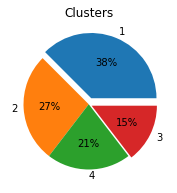

In [32]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data2.Clusters.value_counts(), autopct='%0.f%%', labels=[1,2,4,3], explode=(0.1,0,0,0.05))
plt.title('Clusters')
plt.show()

In [33]:
#Summarizing the cluster
data2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,1,4.472222,96.888889,55.500000,13.338889
1,2,5.738462,143.615385,75.384615,20.492308
2,3,14.671429,251.285714,54.285714,21.685714
3,4,10.940000,265.300000,78.900000,31.280000


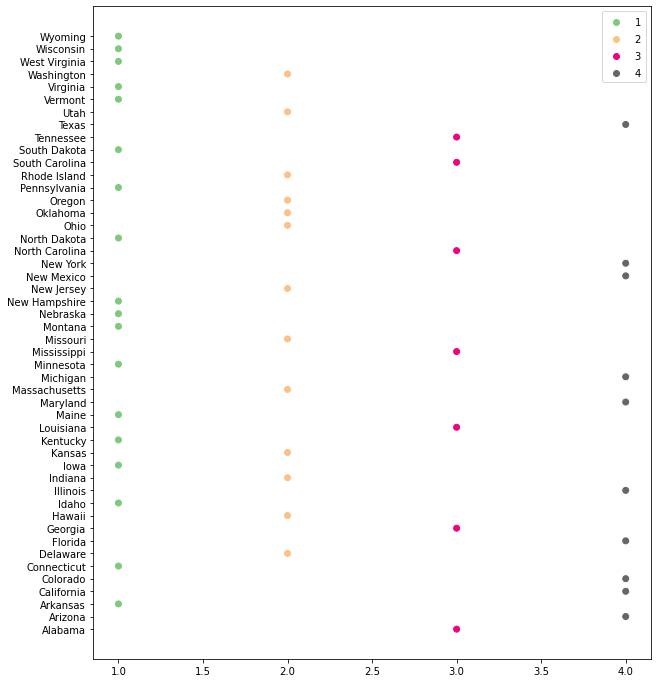

In [34]:
#Visualizing the cluster
plt.figure(figsize=(10,12))
scatter = plt.scatter(data2['Clusters'],data2['States'], c=data2['Clusters'], cmap=plt.cm.Accent)
plt.legend(*scatter.legend_elements())
plt.show()

### Conclusion: 
**From above Hierarchical clustering we can say that cluster no.1 has the lowest average crime rate states, cluster no.4 is the highest average crime rate states followed by cluster no.3 & cluster no.2 in USA.** 

### K-Means

### Elbow Method

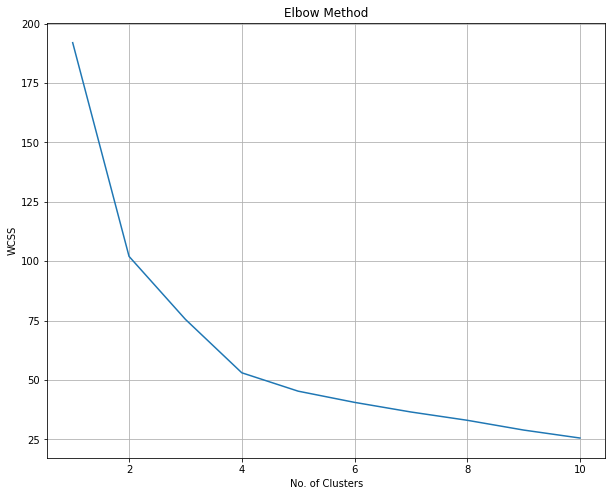

In [35]:
#We will determine the Optimum no.of clusters using elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    kmeans.fit_predict(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8))
plt.plot(range(1,11), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score

In [36]:
silhouette_score(data_norm, kmeans.labels_)

0.27023498778783683

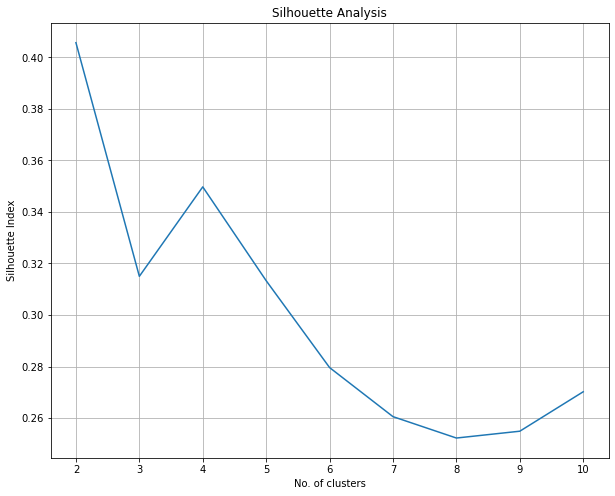

In [37]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(data_norm)
    db_index = silhouette_score(data_norm, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Index")
plt.title('Silhouette Analysis')
plt.show()

### Calinski Harabasz Score

In [38]:
calinski_harabasz_score(data_norm, kmeans.labels_)

27.558785767854413

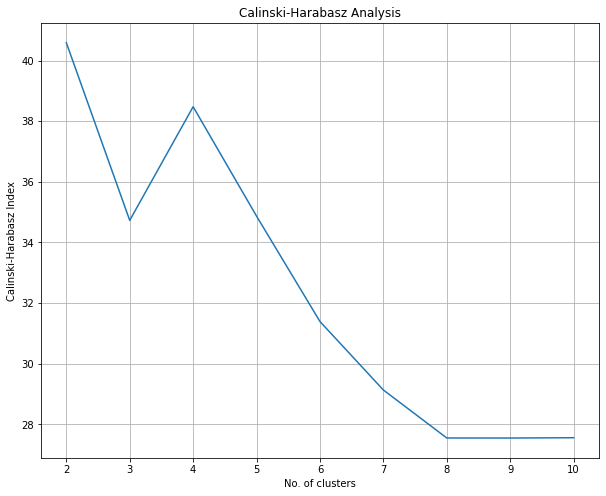

In [39]:
#We will determine the Optimum no.of clusters using calinski_harabasz_score
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(data_norm)
    db_index = calinski_harabasz_score(data_norm, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title('Calinski-Harabasz Analysis')
plt.show()

### From above 3 methods, we can go ahead with no. of clusters = 2 as the Silhouette score and Calinski-Harabasz score are high.

## Model Building & Training

In [40]:
kmeans1 = KMeans(n_clusters=2, random_state=0, max_iter=500)

## Model Prediction

In [41]:
y_km = kmeans1.fit_predict(data_norm)
y_km

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [42]:
#Making clusters starting with no.1
data3 = data1.copy()
data3['Clusters'] = y_km+1
data3

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,2
1,Arizona,8.1,294,80,31.0,2
2,Arkansas,8.8,190,50,19.5,1
3,California,9.0,276,91,40.6,2
4,Colorado,7.9,204,78,38.7,2
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,1
7,Florida,15.4,335,80,31.9,2
8,Georgia,17.4,211,60,25.8,2
9,Hawaii,5.3,46,83,20.2,1


In [43]:
#No. of states in cluster 1
data3[data3['Clusters']==1]

,States,Murder,Assault,UrbanPop,Rape,Clusters
2,Arkansas,8.8,190,50,19.5,1
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,1
9,Hawaii,5.3,46,83,20.2,1
10,Idaho,2.6,120,54,14.2,1
12,Indiana,7.2,113,65,21.0,1
13,Iowa,2.2,56,57,11.3,1
14,Kansas,6.0,115,66,18.0,1
15,Kentucky,9.7,109,52,16.3,1
17,Maine,2.1,83,51,7.8,1


In [44]:
#No. of states in cluster 2
data3[data3['Clusters']==2]

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,2
1,Arizona,8.1,294,80,31.0,2
3,California,9.0,276,91,40.6,2
4,Colorado,7.9,204,78,38.7,2
7,Florida,15.4,335,80,31.9,2
8,Georgia,17.4,211,60,25.8,2
11,Illinois,10.4,249,83,24.0,2
16,Louisiana,15.4,249,66,22.2,2
18,Maryland,11.3,300,67,27.8,2
20,Michigan,12.1,255,74,35.1,2


In [45]:
#No. of clusters and its distribution
data3.Clusters.value_counts()

1    30
2    18
Name: Clusters, dtype: int64

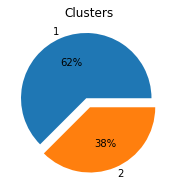

In [46]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data3.Clusters.value_counts(), autopct='%0.f%%', labels=[1,2], explode=(0.1,0.05))
plt.title('Clusters')
plt.show()

In [47]:
#Summarizing the cluster
data3.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,1,4.870000,114.433333,63.633333,15.943333
1,2,12.283333,255.000000,68.833333,27.377778


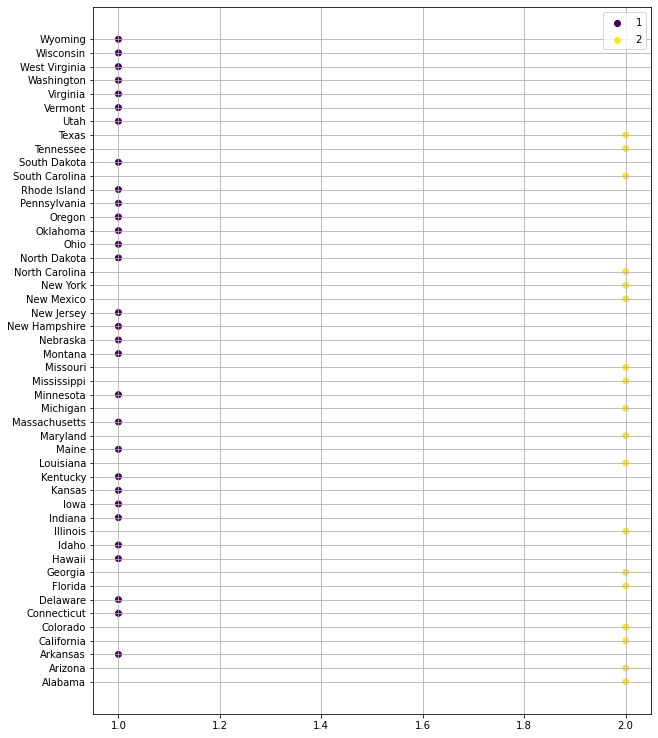

In [48]:
#Visualizing the cluster
plt.figure(figsize=(10,13))
scatter = plt.scatter(data3['Clusters'],data3['States'], c=data3['Clusters'])
plt.legend(*scatter.legend_elements())
plt.grid()
plt.show()

### Conclusion: 
**From above K-Means clustering we can say that cluster no.1 has the lowest average crime rate states, cluster no.2 is the highest average crime rate states in USA. Compared to Hierarchial clustering, K-Means clustering is good and properly segregated into 2 groups.** 

## DBSCAN

### Model Builing and Model Training

In [49]:
db_mod = DBSCAN(eps=0.5, min_samples=5)
db_mod.fit(data_norm)

DBSCAN()

### Model Evaluation

In [50]:
#Noisy samples are given the label -1 which are outliers.
db_mod.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [51]:
np.unique(db_mod.labels_)

array([-1], dtype=int64)

### We will try to tweak hyper-parameters such  as eps & min samples for DBSCAN

### Model Building

In [52]:
db_mod2 = DBSCAN(eps=1.3, min_samples=6)

### Model Training & Evaluation 

In [53]:
db_mod2.fit(data_norm)

DBSCAN(eps=1.3, min_samples=6)

## Model Prediction

In [54]:
y_db = db_mod2.fit_predict(data_norm)
y_db

array([-1,  0,  1, -1, -1,  1,  1, -1, -1,  1,  1,  0,  1,  1,  1,  1, -1,
        1,  0,  1,  0,  1, -1,  1,  1,  1,  1,  1,  0,  0, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [55]:
db_mod2.labels_

array([-1,  0,  1, -1, -1,  1,  1, -1, -1,  1,  1,  0,  1,  1,  1,  1, -1,
        1,  0,  1,  0,  1, -1,  1,  1,  1,  1,  1,  0,  0, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [56]:
np.unique(db_mod2.labels_)

array([-1,  0,  1], dtype=int64)

In [57]:
#Making clusters starting with no.1
data4 = data1.copy()
data4['Clusters'] = y_db*(-1)+2
data4

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Arizona,8.1,294,80,31.0,2
2,Arkansas,8.8,190,50,19.5,1
3,California,9.0,276,91,40.6,3
4,Colorado,7.9,204,78,38.7,3
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,1
7,Florida,15.4,335,80,31.9,3
8,Georgia,17.4,211,60,25.8,3
9,Hawaii,5.3,46,83,20.2,1


In [58]:
#No. of states in cluster 1
data4[data4['Clusters']==1]

,States,Murder,Assault,UrbanPop,Rape,Clusters
2,Arkansas,8.8,190,50,19.5,1
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,1
9,Hawaii,5.3,46,83,20.2,1
10,Idaho,2.6,120,54,14.2,1
12,Indiana,7.2,113,65,21.0,1
13,Iowa,2.2,56,57,11.3,1
14,Kansas,6.0,115,66,18.0,1
15,Kentucky,9.7,109,52,16.3,1
17,Maine,2.1,83,51,7.8,1


In [59]:
#No. of states in cluster 2
data4[data4['Clusters']==2]

,States,Murder,Assault,UrbanPop,Rape,Clusters
1,Arizona,8.1,294,80,31.0,2
11,Illinois,10.4,249,83,24.0,2
18,Maryland,11.3,300,67,27.8,2
20,Michigan,12.1,255,74,35.1,2
28,New Mexico,11.4,285,70,32.1,2
29,New York,11.1,254,86,26.1,2


In [60]:
#No. of states in cluster 3
data4[data4['Clusters']==3]

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
3,California,9.0,276,91,40.6,3
4,Colorado,7.9,204,78,38.7,3
7,Florida,15.4,335,80,31.9,3
8,Georgia,17.4,211,60,25.8,3
16,Louisiana,15.4,249,66,22.2,3
22,Mississippi,16.1,259,44,17.1,3
30,North Carolina,13.0,337,45,16.1,3
37,South Carolina,14.4,279,48,22.5,3


In [61]:
#No. of clusters and its distribution
data4.Clusters.value_counts()

1    33
3     9
2     6
Name: Clusters, dtype: int64

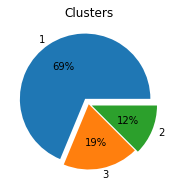

In [62]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data4.Clusters.value_counts(), autopct='%0.f%%', labels=[1,3,2], explode=(0.1,0,0.05))
plt.title('Clusters')
plt.show()

In [63]:
#Summarizing the cluster
data4.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,1,5.484848,121.212121,64.181818,16.936364
1,2,10.733333,272.833333,76.666667,29.350000
2,3,13.533333,265.111111,63.333333,26.233333


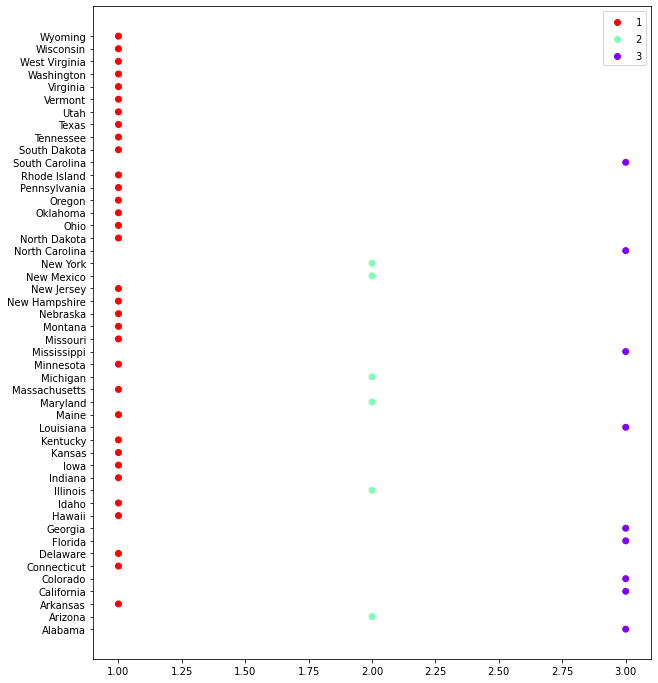

In [64]:
#Visualizing the cluster
plt.figure(figsize=(10,12))
scatter = plt.scatter(data4['Clusters'],data4['States'], c=data4['Clusters'], cmap=plt.cm.rainbow_r)
plt.legend(*scatter.legend_elements())
plt.show()

### Conclusion:
**From above DBSCAN clustering we can say that cluster no.1 has the lowest average crime rate states, cluster no.2 is the highest average crime rate states followed by cluster no.3 in USA.** 

### Final Inference:
**Hence, the K-Means model is far better than DBSCAN & Hierarchical clustering, as it had properly segregated into 2 groups with the help of 3 metrics and also the mean scores of 2 clusters are fairly differentiated among clusters.**

**We can finalise our K-Means model for the clustering the crime_dataset.** 

### =====================================================================